<!-- This cell is automatically updated by tools/tutorial-cell-updater.py -->
<!-- The contents are initialized from tutorials/notebook-header.md -->

[<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>](https://colab.research.google.com/github/speechbrain/speechbrain/blob/develop/docs/tutorials/advanced/pre-trained-models-and-fine-tuning-with-huggingface.ipynb)
to execute or view/download this notebook on
[GitHub](https://github.com/speechbrain/speechbrain/tree/develop/docs/tutorials/advanced/pre-trained-models-and-fine-tuning-with-huggingface.ipynb)

# Pretrained Models and Fine-Tuning with HuggingFace

Training DNN models is often very time-consuming and expensive.
For this reason, whenever it is possible, using off-the-shelf pretrained models can be convenient in various scenarios.

In SpeechBrain we provide pre-trained models and we also encourage users to share their own using <img src="https://huggingface.co/front/assets/huggingface_logo.svg" alt="drawing" width="20"/>[HuggingFace Hub](https://huggingface.co/models)<img src="https://huggingface.co/front/assets/huggingface_logo.svg" alt="drawing" width="20"/> as we strongly believe that sharing models can help research.

You can browse our official pre-trained models [here](https://huggingface.co/speechbrain).

If you have a pre-trained model and want to include it among the official ones, please consider opening a pull request on [GitHub](https://github.com/speechbrain/speechbrain/blob/develop/README.md) with all the details of your model!

We provide a simple and straightforward way to download and instantiate a state-of-the-art pretrained-model and use it either for direct inference or for fine-tuning/knowledge distillation or whatever new fancy technique you can come up with!

With this tutorial, you will learn how to:

1. Use pretrained models to infer on your data.
2. Use pretrained models as a component of a new pipeline (e.g language models, finetuning, speaker embeddings extraction ...).

## Prerequisites
- [SpeechBrain Introduction](https://speechbrain.readthedocs.io/en/latest/tutorials/basics/introduction-to-speechbrain.html)
- [YAML tutorial](https://speechbrain.readthedocs.io/en/latest/tutorials/basics/hyperpyyaml.html)
- [Brain Class tutorial](https://speechbrain.readthedocs.io/en/latest/tutorials/basics/brain-class.html)
- [DataIOBasics](https://speechbrain.readthedocs.io/en/latest/tutorials/basics/data-loading-pipeline.html)


## Installing Dependencies

In [1]:
%%capture
# Installing SpeechBrain via pip
BRANCH = 'develop'
!python -m pip install git+https://github.com/speechbrain/speechbrain.git@$BRANCH

In [2]:
%%capture
import speechbrain
# here we download the material needed for this tutorial: images and an example based on mini-librispeech
!wget https://www.dropbox.com/s/b61lo6gkpuplanq/MiniLibriSpeechTutorial.tar.gz?dl=0
!tar -xvzf MiniLibriSpeechTutorial.tar.gz?dl=0
# downloading mini_librispeech dev data
!wget https://www.openslr.org/resources/31/dev-clean-2.tar.gz
!tar -xvzf dev-clean-2.tar.gz

## Using PreTrained models to perform inference on your data

In this section, we will provide examples on using pretrained models with various tasks including:
1. Automatic Speech Recognition.
2. Speaker Recognition, Verification and Diarization.
3. Source Separation

**Many more can be found in our <img src="https://huggingface.co/front/assets/huggingface_logo.svg" alt="drawing" width="20"/>[HuggingFace Hub](https://huggingface.co/models)<img src="https://huggingface.co/front/assets/huggingface_logo.svg" alt="drawing" width="20"/>!**

### Automatic Speech Recognition

Suppose we want to try out a pretrained ASR model on your data.

Maybe we want to see if our new speech enhancement algorithm is able to also improve Word Error Rate or maybe we just want to transcribe a lecture recording.

After browsing models on <img src="https://huggingface.co/front/assets/huggingface_logo.svg" alt="drawing" width="20"/>[HuggingFace](https://huggingface.co/models)<img src="https://huggingface.co/front/assets/huggingface_logo.svg" alt="drawing" width="20"/>, we choose the following ASR pipeline: [super cool and SOTA ASR pipeline](https://huggingface.co/speechbrain/asr-crdnn-rnnlm-librispeech), trained on LibriSpeech.

This ASR pipeline is made of three components as detailed [here](https://huggingface.co/speechbrain/asr-crdnn-rnnlm-librispeech):


1.   a CRDNN-based seq2seq E2E ASR model trained following this [recipe](https://github.com/speechbrain/speechbrain/tree/develop/recipes/LibriSpeech/ASR/seq2seq).
2.   a RNN-based LM.
3.   a SentencePiece Tokenizer object needed transforms words into subword units.

**Now, we can transcribe any audio file in solely 3 lines of code!**


In [3]:
from speechbrain.inference.ASR import EncoderDecoderASR
asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-rnnlm-librispeech", savedir="./pretrained_ASR", hparams_file="hyperparams_develop.yaml")
asr_model.transcribe_file("./LibriSpeech/dev-clean-2/1272/135031/1272-135031-0003.flac")


hyperparams_develop.yaml:   0%|          | 0.00/4.83k [00:00<?, ?B/s]

normalizer.ckpt:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

asr.ckpt:   0%|          | 0.00/480M [00:00<?, ?B/s]

lm.ckpt:   0%|          | 0.00/212M [00:00<?, ?B/s]

tokenizer.ckpt:   0%|          | 0.00/253k [00:00<?, ?B/s]

'THE LITTLE GIRL HAD BEEN ASLEEP BUT SHE HEARD THE RAPS AND OPENED THE DOOR'

We can validate this result by looking at the oracle transcription for this utterance.

In [4]:
!head ./LibriSpeech/dev-clean-2/1272/135031/1272-135031.trans.txt

1272-135031-0000 BECAUSE YOU WERE SLEEPING INSTEAD OF CONQUERING THE LOVELY ROSE PRINCESS HAS BECOME A FIDDLE WITHOUT A BOW WHILE POOR SHAGGY SITS THERE A COOING DOVE
1272-135031-0001 HE HAS GONE AND GONE FOR GOOD ANSWERED POLYCHROME WHO HAD MANAGED TO SQUEEZE INTO THE ROOM BESIDE THE DRAGON AND HAD WITNESSED THE OCCURRENCES WITH MUCH INTEREST
1272-135031-0002 I HAVE REMAINED A PRISONER ONLY BECAUSE I WISHED TO BE ONE AND WITH THIS HE STEPPED FORWARD AND BURST THE STOUT CHAINS AS EASILY AS IF THEY HAD BEEN THREADS
1272-135031-0003 THE LITTLE GIRL HAD BEEN ASLEEP BUT SHE HEARD THE RAPS AND OPENED THE DOOR
1272-135031-0004 THE KING HAS FLED IN DISGRACE AND YOUR FRIENDS ARE ASKING FOR YOU
1272-135031-0005 I BEGGED RUGGEDO LONG AGO TO SEND HIM AWAY BUT HE WOULD NOT DO SO
1272-135031-0006 I ALSO OFFERED TO HELP YOUR BROTHER TO ESCAPE BUT HE WOULD NOT GO
1272-135031-0007 HE EATS AND SLEEPS VERY STEADILY REPLIED THE NEW KING
1272-135031-0008 I HOPE HE DOESN'T WORK TOO HARD SAID SHAGGY
1272-13

See, easy!

**NOTE**

This syntax can be used also to load models which are in the local filesystem.
In fact, the model is not re-downloaded a second time if it is already found in the local `savedir`.

In [5]:
from speechbrain.inference.ASR import EncoderDecoderASR
asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-rnnlm-librispeech", savedir="./pretrained_ASR", hparams_file="hyperparams_develop.yaml")

### Speaker Verification, Recognition and Diarization

Now suppose we want to perform another task such as diarization and we need a speaker embedding extractor.

Fortunately, we can use directly the pretrained ECAPA TDNN model available [here](https://huggingface.co/speechbrain/spkrec-ecapa-voxceleb). The model is trained with [Voxceleb 2](https://www.robots.ox.ac.uk/~vgg/data/voxceleb/) and we can use it to extract speaker embeddings for each utterance:


In [6]:
from speechbrain.inference.speaker import SpeakerRecognition
import torchaudio
verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="./pretrained_ecapa")
signal, fs = torchaudio.load('./LibriSpeech/dev-clean-2/1272/135031/1272-135031-0003.flac')
embedding = verification.encode_batch(signal)
embedding.shape

hyperparams.yaml:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

embedding_model.ckpt:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

torch.Size([1, 1, 192])

We can visualize how this DNN is able to extract embeddings which are representative of the speaker identity with a **PCA**.

We select 20 random utterances from MiniLibriSpeech corpus:

In [7]:
import glob
import numpy as np
utterances = glob.glob("./LibriSpeech/dev-clean-2/**/*.flac", recursive=True)

In [8]:
np.random.shuffle(utterances)
utterances = utterances[:20]

We extract embeddings on the whole utterances and put corresponding oracle speaker IDs on a list.

In [9]:
from pathlib import Path

embeddings = []
labels = []
for u in utterances:
    tmp, fs = torchaudio.load(u)
    e = verification.encode_batch(tmp)
    embeddings.append(e[0, 0].numpy())
    spk_label = Path(u).parent.parent.stem
    labels.append(spk_label)

We can use sklearn PCA for visualization.

In [10]:
from sklearn.decomposition import PCA

embeddings = np.array(embeddings)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(embeddings)

Finally we can plot the results. It can be seen that some speakers are clustered well even when visualizing only two components with PCA:

Text(0, 0.5, 'Principal Component 2')

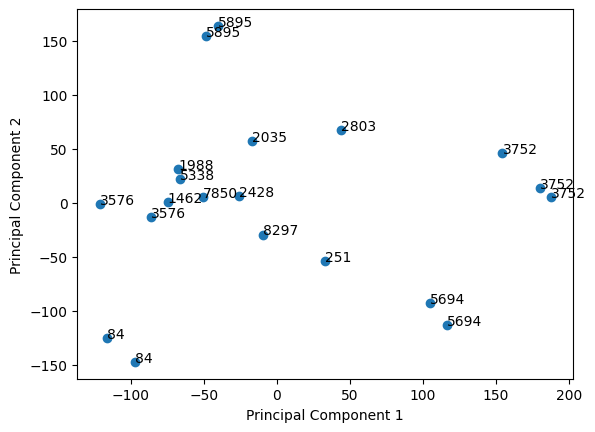

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(principalComponents[:, 0], principalComponents[:, 1])

for i, spkid in enumerate(labels):
    ax.annotate(spkid, (principalComponents[i, 0], principalComponents[i, 1]))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

Given the embeddings computed with the ECAPA-TDNN model, we can perform speaker verification in this way:

In [12]:
# Different files from the same speaker
file1 = './LibriSpeech/dev-clean-2/1272/135031/1272-135031-0000.flac' # Same speaker
file2 = './LibriSpeech/dev-clean-2/1272/141231/1272-141231-0004.flac' # Same speaker
file3 = './LibriSpeech/dev-clean-2/1462/170142/1462-170142-0000.flac'  # Different speaker

# Test with 2 files from the same speaker
score, prediction = verification.verify_files(file1, file2)
print(score, prediction)

# Test with 2 files from  different speakers
score, prediction = verification.verify_files(file1, file3)
print(score, prediction)

tensor([0.6952]) tensor([True])
tensor([0.0159]) tensor([False])


LibriSpeech is a very easy task for speaker verification. However, the ECAPA model works very well on other types of data. With voxceleb, we achieved an Equal Error Rate of 0.69%. Feel free to record yourself  (with a sampling rate of 16 kHz) and play with that!

### Source Separation

What about Source Separation ?
A pretrained SepFormer model is available [here]:(https://huggingface.co/speechbrain/sepformer-wsj02mix). It can be used right out off the box to perform separation on clean speech mixtures.


We create an artificial mixture here by mixing together two utterances from MiniLibriSpeech.

In [13]:
import torchaudio
s1, fs = torchaudio.load('./LibriSpeech/dev-clean-2/1272/135031/1272-135031-0003.flac')
s2, fs = torchaudio.load('./LibriSpeech/dev-clean-2/1462/170142/1462-170142-0001.flac')

# we resample because we will use a model trained on 8KHz data.
resampler = torchaudio.transforms.Resample(fs, 8000)
s1 = resampler(s1)
s2 = resampler(s2)
fs= 8000

min_len = min(s1.shape[-1], s2.shape[-1])
s1 = s1[:, :min_len]
s2 = s2[:, :min_len]
mix = s1 + s2

In [14]:
import IPython.display as ipd

We can listen to this artificial mixture.

In [15]:
ipd.Audio(mix[0], rate=fs)

Now, we can instantiate the pretrained SepFormer from <img src="https://huggingface.co/front/assets/huggingface_logo.svg" alt="drawing" width="20"/>[HuggingFace](https://huggingface.co/models)<img src="https://huggingface.co/front/assets/huggingface_logo.svg" alt="drawing" width="20"/>.

In [16]:
from speechbrain.inference.separation import SepformerSeparation
separator = SepformerSeparation.from_hparams(source="speechbrain/sepformer-wsj02mix", savedir="./pretrained_sepformer")

hyperparams.yaml:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

masknet.ckpt:   0%|          | 0.00/113M [00:00<?, ?B/s]

encoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

decoder.ckpt:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

and we use it to separate the mixture

In [17]:
est_sources = separator.separate_batch(mix)

In [18]:
est_sources = est_sources[0] # strip batch dimension

You can listen at the results here:

In [19]:
ipd.Audio(est_sources[:, 0], rate=fs)

In [20]:
ipd.Audio(est_sources[:, 1], rate=fs)

## Fine-tuning or using pretrained models as components of a new pipeline

Here we will show how to fine-tune the CRDNN Encoder Decoder Seq2Seq model used to transcribe the audio in the previous example and downloaded from [here](https://huggingface.co/speechbrain/asr-crdnn-rnnlm-librispeech/blob/main/hyperparams.yaml).






In [21]:
from speechbrain.inference.ASR import EncoderDecoderASR
asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-rnnlm-librispeech", savedir="./pretrained_ASR", hparams_file="hyperparams_develop.yaml")

First we can see that the pretrained `asr_model` allows to access easily all its components:


In [22]:
asr_model.mods.keys()

odict_keys(['normalizer', 'encoder', 'decoder', 'lm_model'])

These keys corresponds to the modules entry specified in the [hyperparameter file](https://huggingface.co/speechbrain/asr-crdnn-rnnlm-librispeech/blob/main/hyperparams.yaml):


```yaml
modules:
    encoder: !ref <encoder>
    decoder: !ref <decoder>
    lm_model: !ref <lm_model>
```

We can also see that the encoder is actually composed of several sub-modules:

```yaml
encoder: !new:speechbrain.nnet.containers.LengthsCapableSequential
    input_shape: [null, null, !ref <n_mels>]
    compute_features: !ref <compute_features>
    normalize: !ref <normalize>
    model: !ref <enc>
```



These are simply accessible as members of the encoder:

In [23]:
asr_model.mods.encoder

LengthsCapableSequential(
  (compute_features): Fbank(
    (compute_STFT): STFT()
    (compute_fbanks): Filterbank()
    (compute_deltas): Deltas()
    (context_window): ContextWindow()
  )
  (normalize): InputNormalization()
  (model): CRDNN(
    (CNN): Sequential(
      (block_0): CNN_Block(
        (conv_1): Conv2d(
          (conv): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1))
        )
        (norm_1): LayerNorm(
          (norm): LayerNorm((40, 128), eps=1e-05, elementwise_affine=True)
        )
        (act_1): LeakyReLU(negative_slope=0.01)
        (conv_2): Conv2d(
          (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
        )
        (norm_2): LayerNorm(
          (norm): LayerNorm((40, 128), eps=1e-05, elementwise_affine=True)
        )
        (act_2): LeakyReLU(negative_slope=0.01)
        (pooling): Pooling1d(
          (pool_layer): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False)
        )
        (dro

In [24]:
asr_model.mods.encoder.compute_features

Fbank(
  (compute_STFT): STFT()
  (compute_fbanks): Filterbank()
  (compute_deltas): Deltas()
  (context_window): ContextWindow()
)

The training hyperparameters also can be easily accessed:

In [25]:
dir(asr_model.hparams)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'activation',
 'asr_model',
 'beam_size',
 'blank_index',
 'bos_index',
 'cnn_blocks',
 'cnn_channels',
 'cnn_kernelsize',
 'compute_features',
 'coverage_penalty',
 'coverage_scorer',
 'ctc_lin',
 'dec',
 'dec_neurons',
 'decoder',
 'dnn_blocks',
 'dnn_neurons',
 'dropout',
 'emb',
 'emb_size',
 'enc',
 'encoder',
 'eos_index',
 'eos_threshold',
 'inter_layer_pooling_size',
 'lm_model',
 'lm_weight',
 'log_softmax',
 'max_attn_shift',
 'max_decode_ratio',
 'min_decode_ratio',
 'modules',
 'n_fft',
 'n_mels',
 'normalizer',
 'output_neurons',
 'pretrainer',
 'rnn_bidirectional',
 'rnn_class',
 'rnn_layers',
 'rnn_neurons',
 'rnnlm_scorer',
 'sample_rat

Such information are pretty useful as we can directly use some of these hyperparameters in our fine-tuning pipeline to ensure compability with the pretrained model (e.g. use the same BOS or EOS indexes)!

### Setting up the data pipeline

First we must set up the data pipeline for downloaded MiniLibriSpeech data.

If you are not familiar with **SpeechBrain dataIO** you may want to take a look at the [tutorial](https://speechbrain.readthedocs.io/en/latest/tutorials/basics/data-loading-pipeline.html).

In [26]:
import speechbrain as sb
import torch

We parse MiniLibriSpeech to a suitable JSON annotation

In [27]:
from parse_data import parse_to_json # parse_data is a local library downloaded before (see Installing Dependencies step)
parse_to_json("./LibriSpeech/dev-clean-2")

We instantiate a **DynamicItemDataset** from the JSON annotation

In [28]:
from speechbrain.dataio.dataset import DynamicItemDataset
dataset = DynamicItemDataset.from_json("data.json")

We sort the dataset based on length to speed-up training

In [29]:
dataset = dataset.filtered_sorted(sort_key="length", select_n=100)
# we limit the dataset to 100 utterances to keep the trainin short in this Colab example

and add a pipeline for reading audio

In [30]:
dataset.add_dynamic_item(sb.dataio.dataio.read_audio, takes="file_path", provides="signal")

and another one to encode the words from annotation.

It is worth noting that we use the Tokenizer object obtained from the pretrained `asr_model` and  that we encode the words with `asr_model.tokenizer.encode_as_ids(words)`. We also reuse `asr_model` `eos_index` and `bos_index` accessed via `asr_model.hparams` to ensure that all these parameters correspond to the ones used at pretraining time!

In [31]:
# 3. Define text pipeline:
@sb.utils.data_pipeline.takes("words")
@sb.utils.data_pipeline.provides(
        "words", "tokens_list", "tokens_bos", "tokens_eos", "tokens")
def text_pipeline(words):
      yield words
      tokens_list = asr_model.tokenizer.encode_as_ids(words)
      yield tokens_list
      tokens_bos = torch.LongTensor([asr_model.hparams.bos_index] + (tokens_list))
      yield tokens_bos
      tokens_eos = torch.LongTensor(tokens_list + [asr_model.hparams.eos_index]) # we use same eos and bos indexes as in pretrained model
      yield tokens_eos
      tokens = torch.LongTensor(tokens_list)
      yield tokens

In [32]:
dataset.add_dynamic_item(text_pipeline)

We set the dataset object to return the signal tensor as well as the encoded tokens and words.

In [33]:
dataset.set_output_keys(["id", "signal", "words", "tokens_list", "tokens_bos", "tokens_eos", "tokens"])
dataset[0]

{'id': '777-126732-0081',
 'signal': tensor([-9.1553e-05, -3.6621e-04, -4.8828e-04,  ...,  2.1362e-04,
          2.4414e-04,  3.3569e-04]),
 'words': 'COMFORTABLE DEAR',
 'tokens_list': [875, 157, 598],
 'tokens_bos': tensor([  0, 875, 157, 598]),
 'tokens_eos': tensor([875, 157, 598,   0]),
 'tokens': tensor([875, 157, 598])}

### Fine-Tuning the ASR model

First, We define our Brain class that will perform the fine-tuning. Here, we just take an example similar to the Brain class of the original [Seq2Seq LibriSpeech recipe](https://github.com/speechbrain/speechbrain/blob/develop/recipes/LibriSpeech/ASR/seq2seq/train.py).


In [34]:
from speechbrain.lobes.features import Fbank
import torch

# Define fine-tuning procedure
class EncDecFineTune(sb.Brain):

    def on_stage_start(self, stage, epoch):
        # enable grad for all modules we want to fine-tune
        if stage == sb.Stage.TRAIN:
            for module in [self.modules.enc, self.modules.emb, self.modules.dec, self.modules.seq_lin]:
                for p in module.parameters():
                    p.requires_grad = True

    def compute_forward(self, batch, stage):
        """Forward computations from the waveform batches to the output probabilities."""
        batch = batch.to(self.device)
        wavs, wav_lens = batch.signal
        tokens_bos, _ = batch.tokens_bos
        wavs, wav_lens = wavs.to(self.device), wav_lens.to(self.device)

        # Forward pass
        feats = self.modules.compute_features(wavs)
        feats = self.modules.normalize(feats, wav_lens)
        #feats.requires_grad = True
        x = self.modules.enc(feats)

        e_in = self.modules.emb(tokens_bos)  # y_in bos + tokens
        h, _ = self.modules.dec(e_in, x, wav_lens)

        # Output layer for seq2seq log-probabilities
        logits = self.modules.seq_lin(h)
        p_seq = self.hparams.log_softmax(logits)

        return p_seq, wav_lens

    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss (CTC+NLL) given predictions and targets."""


        p_seq, wav_lens = predictions

        ids = batch.id
        tokens_eos, tokens_eos_lens = batch.tokens_eos
        tokens, tokens_lens = batch.tokens

        loss = self.hparams.seq_cost(
            p_seq, tokens_eos, tokens_eos_lens)


        return loss


Here we define the modules and hyperparameters needed for the Brain class defined before.

We fetch them directly from the pretrained model by accessing its `modules` and `hparams`. These can be found in the `hyperparams.yaml` file in the model [HuggingFace repo](https://huggingface.co/speechbrain/asr-crdnn-rnnlm-librispeech/blob/main/hyperparams.yaml).

In [35]:
modules = {"enc": asr_model.mods.encoder.model,
           "emb": asr_model.hparams.emb,
           "dec": asr_model.hparams.dec,
           "compute_features": asr_model.mods.encoder.compute_features, # we use the same features
           "normalize": asr_model.mods.encoder.normalize,
           "seq_lin": asr_model.hparams.seq_lin,

          }

hparams = {"seq_cost": lambda x, y, z: speechbrain.nnet.losses.nll_loss(x, y, z, label_smoothing = 0.1),
            "log_softmax": speechbrain.nnet.activations.Softmax(apply_log=True)}

brain = EncDecFineTune(modules, hparams=hparams, opt_class=lambda x: torch.optim.SGD(x, 1e-5))
brain.tokenizer = asr_model.tokenizer

The pre-trained model can be finally fine-tuned:

In [36]:
brain.fit(range(2), train_set=dataset,
          train_loader_kwargs={"batch_size": 8, "drop_last":True, "shuffle": False})

100%|██████████| 12/12 [05:35<00:00, 27.99s/it, train_loss=1.28]


## Pretrainer Class
In speechbrain, another way to perform pre-training is to use the PreTrainer Class (`speechbrain.utils.parameter_transfer.Pretrainer`). It orchestrates parameter transfer in a more structured way, which can aid in writing easy-to-share recipes (and it is also central in the implementation `speechbrain.pretrained` models). To use it, let's first initialize a model:

In [37]:
from speechbrain.lobes.models.ECAPA_TDNN import ECAPA_TDNN

model = ECAPA_TDNN(input_size= 80,
                   channels= [1024, 1024, 1024, 1024, 3072],
                   kernel_sizes= [5, 3, 3, 3, 1],
                   dilations= [1, 2, 3, 4, 1],
                   attention_channels= 128,
                   lin_neurons = 192)

At this level, the model is initialized with random parameters. However, we can use our pretrainer to replace random parameters with the ones stored in the saved checkpoint:

In [38]:
from speechbrain.utils.parameter_transfer import Pretrainer

# Initialization of the pre-trainer
pretrain = Pretrainer(loadables={'model': model}, paths={'model': 'speechbrain/spkrec-ecapa-voxceleb/embedding_model.ckpt'})

# We download the pretrained model from HuggingFace in this case
pretrain.collect_files()
pretrain.load_collected()

Now, the model is not anymore randomly initialized, but it contains the pre-trained parameters of `embedding_model.ckpt`.  The path of the pre-trained model can be a **local path**, a **web url**, or a **huggingface repository**:

In [39]:
# Local Path
pretrain = Pretrainer(collect_in='model_local', loadables={'model': model}, paths={'model': 'model_checkpoints/model.ckpt'})
pretrain.collect_files()
pretrain.load_collected()

# Or web
pretrain = Pretrainer(collect_in='model_web', loadables={'model': model}, paths={'model': 'https://www.dropbox.com/s/2mdnl784ram5w8o/embedding_model.ckpt?dl=1'})
pretrain.collect_files()
pretrain.load_collected()

As you can see, you can use the variable `collect_in` to set where the pre-trained model is stored.

## Acknowledgements


*   Many thanks to ([ziz19](https://github.com/ziz19)) who helped improving this Tutorial.


## Citing SpeechBrain

If you use SpeechBrain in your research or business, please cite it using the following BibTeX entry:

```bibtex
@misc{speechbrainV1,
  title={Open-Source Conversational AI with {SpeechBrain} 1.0},
  author={Mirco Ravanelli and Titouan Parcollet and Adel Moumen and Sylvain de Langen and Cem Subakan and Peter Plantinga and Yingzhi Wang and Pooneh Mousavi and Luca Della Libera and Artem Ploujnikov and Francesco Paissan and Davide Borra and Salah Zaiem and Zeyu Zhao and Shucong Zhang and Georgios Karakasidis and Sung-Lin Yeh and Pierre Champion and Aku Rouhe and Rudolf Braun and Florian Mai and Juan Zuluaga-Gomez and Seyed Mahed Mousavi and Andreas Nautsch and Xuechen Liu and Sangeet Sagar and Jarod Duret and Salima Mdhaffar and Gaelle Laperriere and Mickael Rouvier and Renato De Mori and Yannick Esteve},
  year={2024},
  eprint={2407.00463},
  archivePrefix={arXiv},
  primaryClass={cs.LG},
  url={https://arxiv.org/abs/2407.00463},
}
@misc{speechbrain,
  title={{SpeechBrain}: A General-Purpose Speech Toolkit},
  author={Mirco Ravanelli and Titouan Parcollet and Peter Plantinga and Aku Rouhe and Samuele Cornell and Loren Lugosch and Cem Subakan and Nauman Dawalatabad and Abdelwahab Heba and Jianyuan Zhong and Ju-Chieh Chou and Sung-Lin Yeh and Szu-Wei Fu and Chien-Feng Liao and Elena Rastorgueva and François Grondin and William Aris and Hwidong Na and Yan Gao and Renato De Mori and Yoshua Bengio},
  year={2021},
  eprint={2106.04624},
  archivePrefix={arXiv},
  primaryClass={eess.AS},
  note={arXiv:2106.04624}
}
```